# How to make a Logo

### first import good tools

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spike
import spike.NMR


          SPIKE
    Version     : 0.99.21
    Date        : 23-02-2021
    Revision Id : 490
*** zoom3D not loaded ***
plugins loaded:
Fitter,  Linear_prediction,  Peaks,  bcorr,  fastclean,  gaussenh,  rem_ridge,  sane,  sg,  test,  urQRd, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin
plugins loaded:
Bruker_NMR_FT,  Bucketing,  Integrate,  PALMA,  apmin, 


### import (or *simulate*) a nice time-signal
for instance a 1 sec FID sampled at 1kHz - with a multiplet structure

1D data-set
Axis F1 :NMR axis at 400.000000 MHz, 1000 complex pairs,  from 0.000000 ppm (0.000000 Hz) to 2.500000 ppm  (1000.000000 Hz)
data-set is complex

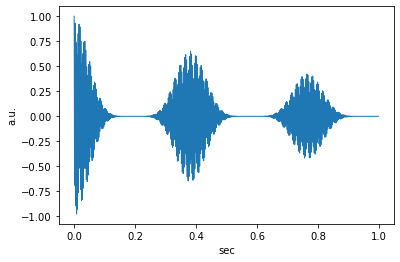

In [2]:
# set-up scene
sw = 1000.0    # spectral width in Hz
w = 314.15926  # line position in Hz
J = 1.3        # coupling in Hz
tau = 0.9      # damping in second

# generate main frequency
t = np.arange(1000)/sw
fid = (np.cos(2*np.pi*w*t)+1j*np.sin(2*np.pi*w*t))*np.exp(-t/tau)

# add a pattern - here a heptuplet.
for i in range(6):
    fid *= np.cos(2*np.pi*J*t)

# load into spike
data = spike.NMR.NMRData(buffer=fid) 
data.axis1.specwidth = sw
data.set_unit('sec').display()

# And process
Here, comparing a simple FFT to a apodisation with a shifted sine-bell

In [3]:
# compute
d1 = data.copy().zf(16).fft()
d2 = data.copy().apod_sin().zf(16).fft()

### and draw the picture with nice settings

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['open sans'] not found. Falling back to DejaVu Sans.


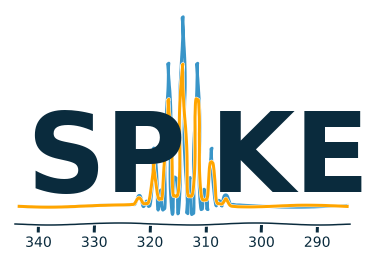

In [4]:
# define zoom and draw
z = (w+30, w-30)
darkblue = '#0A2B3D'
with plt.xkcd(length=150):   # add some effect
    d1.set_unit('Hz').display(zoom=z, linewidth=3, color='#3995C8')
    d2.set_unit('Hz').display(zoom=z, linewidth=3, color='orange', new_fig=False) #figure=d1.mplfigure) # other possibility
# add some text
fd = {'fontfamily': 'open sans',
      'color':  darkblue,
      'weight': 'semibold',
      'size': 110}
plt.text(w+28,15,'SP', fontdict=fd)
plt.text(w-5,15,'KE',  fontdict=fd)
# clean picture and change axes
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
gca = plt.gca()
for side in ['top','left','right']:
    gca.spines[side].set_color('white')
gca.spines['bottom'].set_color(darkblue)
gca.xaxis.set_tick_params(color=darkblue, labelcolor=darkblue)
# and save
plt.savefig('Logo.png')